In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


## StartUp Data set

In [2]:
data = pd.read_csv('50_startUps.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [7]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
data.shape

(50, 5)

In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


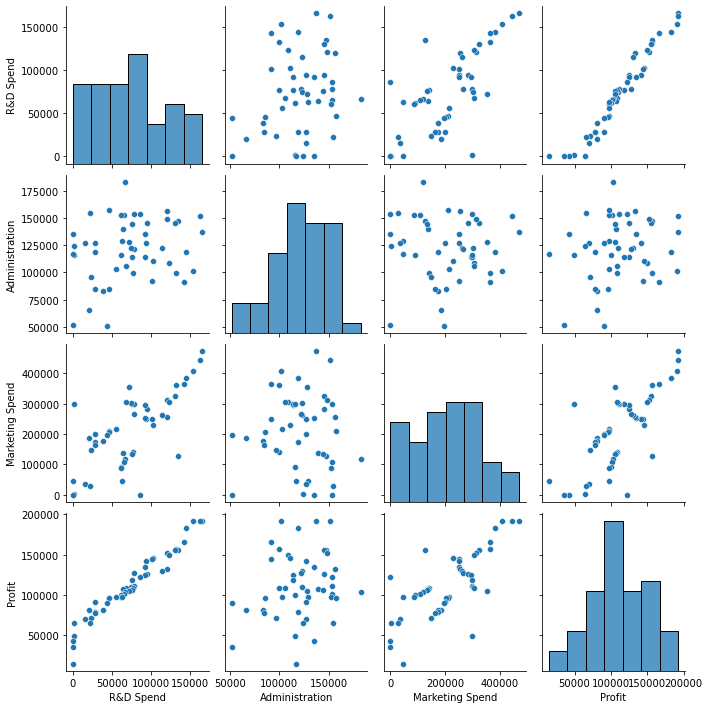

In [10]:
sns.pairplot(data=data)

### Preparing the Model

In [11]:
dat = data.rename(columns={"R&D Spend": "RD", "Administration": "AD","Marketing Spend": "MS","Profit":"PR"}, errors ="raise")
dat.head()

,RD,AD,MS,State,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
model = smf.ols('PR~RD+AD+MS',data = dat).fit()

In [13]:
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        16:11:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [16]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

### Simple Linear Regression Model

In [17]:
pr_r=smf.ols('PR~RD',data=dat).fit()
print(pr_r.tvalues, '\n' ,pr_r.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [18]:
pr_a=smf.ols('PR~AD',data=dat).fit()
print(pr_r.tvalues, '\n' ,pr_r.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [19]:
pr_m=smf.ols('PR~MS',data=dat).fit()
print(pr_r.tvalues, '\n' ,pr_r.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


### Calculate VIF

In [20]:
rsq_rd = smf.ols('RD~AD+MS',data=dat).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('AD~RD+MS',data=dat).fit().rsquared
vif_ad = 1/(1-rsq_ad) 

rsq_ms = smf.ols('MS~RD+AD',data=dat).fit().rsquared
vif_ms = 1/(1-rsq_ms) 

d1 = {'Variables':['RD','AD','MS'],'VIF':[vif_rd,vif_ad,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


### Residual Analysis

/Users/vaibhavitaide/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


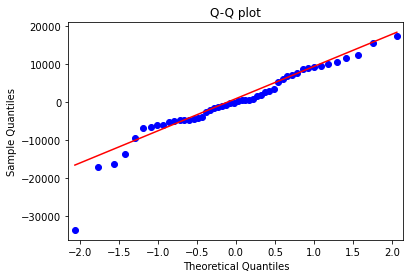

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Q-Q plot")
plt.show()

In [22]:
list(np.where(model.resid<-20000))

[array([49])]

In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

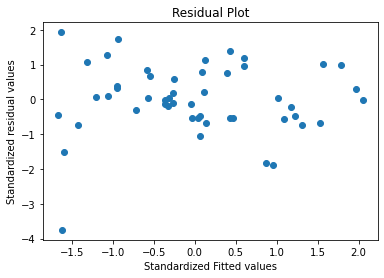

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

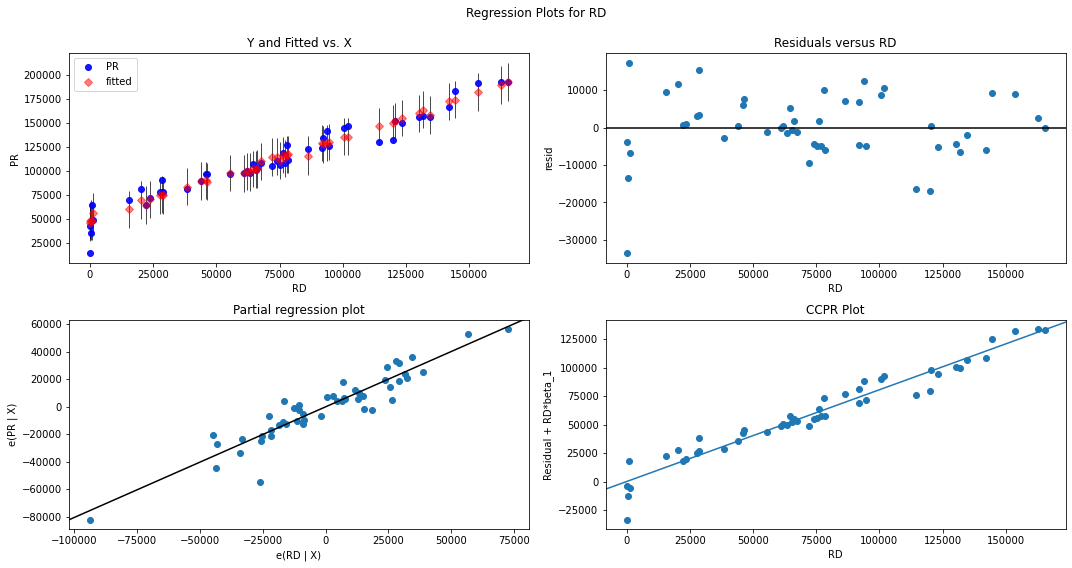

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In [26]:
ig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "AD", fig=fig)
plt.show()

<Figure size 1080x576 with 0 Axes>

In [27]:
ig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

<Figure size 1080x576 with 0 Axes>

### Cook's Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

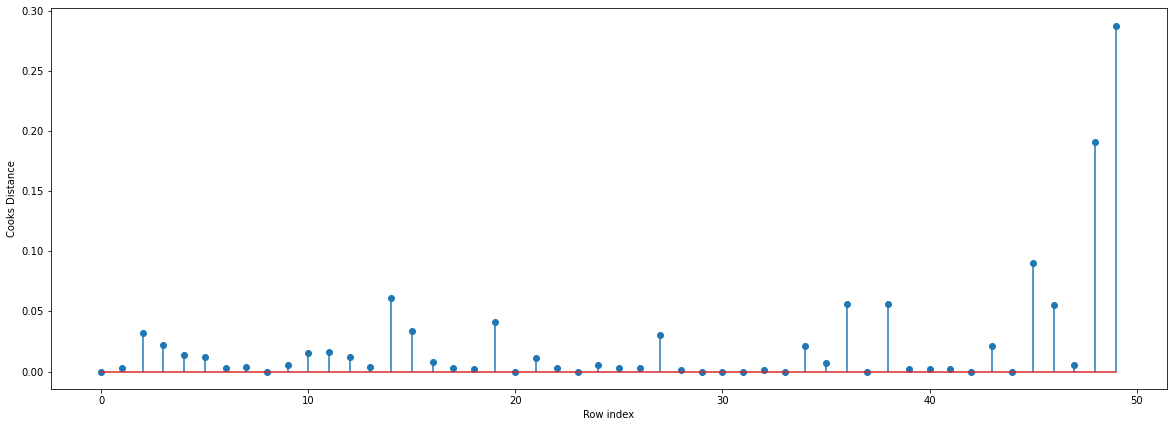

In [29]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

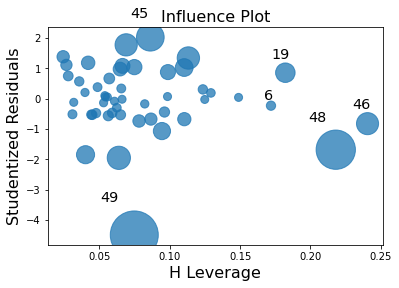

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [32]:
dat[dat.index.isin([49,48,45,46])]

,RD,AD,MS,State,PR
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [33]:
dat.head()

,RD,AD,MS,State,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
data_new = pd.read_csv("50_Startups.csv")

In [35]:
start = data_new.drop(data_new.index[[49,48,45,46]],axis=0).reset_index()

In [36]:
start.tail()

,index,R&D Spend,Administration,Marketing Spend,State,Profit
41,41,27892.92,84710.77,164470.71,Florida,77798.83
42,42,23640.93,96189.63,148001.11,California,71498.49
43,43,15505.73,127382.30,35534.17,New York,69758.98
44,44,22177.74,154806.14,28334.72,California,65200.33
45,47,0.00,135426.92,0.00,California,42559.73


In [42]:
start.corr()

,index,R&D Spend,Administration,Marketing Spend,Profit
index,1.000000,-0.974304,-0.159176,-0.729112,-0.975611
R&D Spend,-0.974304,1.000000,0.176838,0.724691,0.977222
Administration,-0.159176,0.176838,1.000000,-0.144793,0.107816
Marketing Spend,-0.729112,0.724691,-0.144793,1.000000,0.762568
Profit,-0.975611,0.977222,0.107816,0.762568,1.000000


In [43]:
 dat= start.rename(columns={"R&D Spend": "RD", "Administration": "AD","Marketing Spend": "MS","Profit":"PR"}, errors ="raise")
dat.head()

,index,RD,AD,MS,State,PR
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [46]:
final_model_r = smf.ols('PR~RD+MS',data = dat).fit()
final_model_r.rsquared,final_model_r.aic

(0.9611920624974509, 949.7556721616616)

In [47]:
final_model_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.59e-31
Time:                        16:49:09   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
RD             0.7507      0.037     20.511      0.000       0.677       0.825
MS             0.0350      0.013      2.627      0.012       0.008       0.062
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

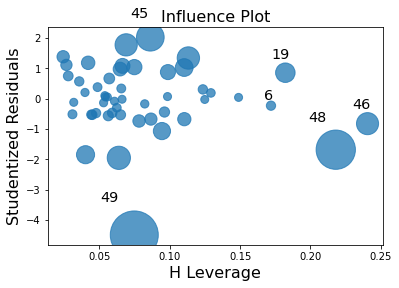

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [49]:
final_model_temp = smf.ols('PR~RD+AD+MS',data = dat).fit()
final_model_temp.rsquared,final_model_temp.aic

(0.962593650298269, 950.0635928720131)

In [50]:
final_model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     360.3
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           5.56e-30
Time:                        16:50:11   Log-Likelihood:                -471.03
No. Observations:                  46   AIC:                             950.1
Df Residuals:                      42   BIC:                             957.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.69e+04   5788.198      9.830      0.000    4.52e+04    6.86e+04
RD             0.7714      0.040     19.320      0.000       0.691       0.852
AD            -0.0540      0.043     -1.254      0.217      -0.141       0.033
MS             0.0277      0.014      1.916      0.062      -0.001       0.057
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.291
Skew:                          -0.053   Prob(JB):                        0.865
Kurtosis:                       2.625   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
dat.head()

,index,RD,AD,MS,State,PR
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


### New Data

In [52]:
new_data= pd.DataFrame({'RD': 123456,'AD':120345,'MS':444444.10},index=[1])

In [53]:
new_data

,RD,AD,MS
1,123456,120345,444444.1


In [54]:
final_model_temp.predict(new_data)

1    157949.547943
dtype: float64

### 

In [55]:
def price_prediction(RD,AD,MS):
    new_data= pd.DataFrame({'RD': RD,'AD':AD,'MS':MS},index=[1])
    print("Predected price value:",final_model_temp.predict(new_data))

In [57]:
price_prediction(177777.70,163227.59,653489.53)

Predected price value: 1    203331.320924
dtype: float64


In [59]:
final_model_temp1 = smf.ols('PR~RD+MS',data = dat).fit()
final_model_temp1.rsquared,final_model_temp.aic

(0.9611920624974509, 950.0635928720131)

In [60]:
def price_prediction1(RD,MS):
    new_data1= pd.DataFrame({'RD': RD,'MS':MS},index=[1])
    print("Predected price value:",final_model_temp.predict(new_data))

In [61]:
price_prediction1(122345.41,234567.62)

Predected price value: 1    157949.547943
dtype: float64


In [62]:
final_model_temp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.59e-31
Time:                        16:55:14   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
RD             0.7507      0.037     20.511      0.000       0.677       0.825
MS             0.0350      0.013      2.627      0.012       0.008       0.062
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""